<h1>Exploratory Data Analysis on Bank of Botswana data for Inflation Rates, Exchange Rates, and Prices</h1>

<h3>Introduction</h3>

This is the second notebook for the project for predicting inflation rate using data collected from Bank of Botswana. The first notebook was about collecting the data and cleaning it by dealing with various issues such as missing values.

This notebook will take a look at various patterns in the data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from scipy.stats import boxcox

Bringing the cleaned data into the notebook

In [6]:
df = pd.read_csv('../Data/Economic_Data_BOB')

In [7]:
df.head()

,date,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
0,2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
1,2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2,2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
3,2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
4,2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6


In [8]:
df.tail(10)

,date,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
5497,2009-07-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,6.0,7.4,14.2
5498,2009-08-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,6.1,6.9,13.4
5499,2009-02-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,11.7,10.2,15.8
5500,2009-03-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,11.7,10.6,15.8
5501,2008-11-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,15.0,13.6,15.5
5502,2008-05-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,12.1,11.0,9.1
5503,2008-06-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,14.5,12.5,9.8
5504,2008-07-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,15.0,12.7,11.1
5505,2008-03-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,9.8,9.7,8.9
5506,2008-01-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,8.4,7.9,7.2


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.set_index('date', inplace=True)

In [11]:
df = df.loc['2008-01-01':'2022-09-02']

In [12]:
df.head(20)

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
date,,,,,,,,,,,,
2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6
2022-08-26,2.15,2.43,0.5393,0.0788,0.0665,0.0785,0.0602,10.75,1.3176,12.7,10.3,6.6
2022-08-25,2.15,2.43,0.5379,0.0783,0.0662,0.0785,0.0600,10.72,1.3225,12.7,10.3,6.6
2022-08-24,2.15,2.43,0.5359,0.0784,0.0660,0.0779,0.0598,10.66,1.3294,12.7,10.3,6.6
2022-08-23,2.15,2.44,0.5360,0.0786,0.0664,0.0779,0.0599,10.70,1.3278,12.7,10.3,6.6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3771 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    3771 non-null   float64
 1   1 Month BoBC  3771 non-null   float64
 2   CHN           3771 non-null   float64
 3   EUR           3771 non-null   float64
 4   GBP           3771 non-null   float64
 5   USD           3771 non-null   float64
 6   SDR           3771 non-null   float64
 7   YEN           3771 non-null   float64
 8   ZAR           3771 non-null   float64
 9   CPI           3771 non-null   float64
 10  CPIT          3771 non-null   float64
 11  CPIXA         3771 non-null   float64
dtypes: float64(12)
memory usage: 383.0 KB


As expected, there are no missing values. A quick look at summary statistics:

In [14]:
df.describe()

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,4.194962,0.021199,0.240576,0.090499,0.076469,0.113843,0.077152,11.440367,1.234126,5.906046,5.569451,5.716309
std,3.791778,0.225670,0.302073,0.011229,0.010232,0.024041,0.017314,1.658064,0.114577,3.431899,3.065374,3.178861
min,0.730000,0.000000,0.000000,0.071800,0.058800,0.077200,0.059500,8.690000,1.025800,0.900000,1.000000,1.600000
25%,1.290000,0.000000,0.000000,0.082200,0.067600,0.092900,0.067000,10.210000,1.141650,3.100000,2.900000,3.300000
50%,3.010000,0.000000,0.000000,0.086700,0.074200,0.104800,0.072800,11.100000,1.236300,4.600000,4.200000,5.300000
75%,6.570000,0.000000,0.599650,0.100726,0.084800,0.138200,0.089450,12.340000,1.324050,8.200000,7.900000,7.000000
max,13.130000,2.440000,0.678700,0.117500,0.100400,0.167700,0.821000,18.210000,1.549000,15.100000,13.600000,16.400000


<h3>Exploratory Data Analysis</h3>

We are looking to work on the time series data and engineer it into machine learning data. ie. The idea is to convert the data from time and value, to inputs and outputs. For the sake of initial simplicity, the data will be prepared for a univariate analysis. A multivariate analysis shall also be performed in this project after the initial analysis.

In [15]:
#One more look at the dataframe we have so far:

df.head()

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
date,,,,,,,,,,,,
2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6


In [16]:
#Making a new dataframe for the univariate analysis (unidf)
unidf = df[['CPI']]
unidf.head(5)

,CPI
date,
2022-09-02,12.7
2022-09-01,12.7
2022-08-31,12.7
2022-08-30,12.7
2022-08-29,12.7


<h4>Adding LAG Features</h4>

Adding lag features is the most common way of engineering a time series dataset into a supervised learning machine learning dataset. We simply add 'lag' features or previous entries which will be used to predict the next value.

In [17]:
lagdf = pd.concat([unidf.shift(1), unidf], axis=1)
lagdf.columns = ['t', 't+1']
lagdf

,t,t+1
date,,
2022-09-02,NaN,12.7
2022-09-01,12.7,12.7
2022-08-31,12.7,12.7
2022-08-30,12.7,12.7
2022-08-29,12.7,12.7
...,...,...
2008-05-01,15.0,12.1
2008-06-01,12.1,14.5
2008-07-01,14.5,15.0


As can be seen above, lag features have been added. This is also called the sliding window method and in this case, it is using a window width of 1. 1 may not necessarily be the best window size. The size of the window will be reviewed farther into the project. Diminishing returns will be analyzed at the modelling stage to see what the best window size may be. Also, depending on the seasonality of the data, a decision could be made to use data from previous months or even years.

<h4>Rolling Window</h4>

In this section, we calculate summary statistics of values at previous times. An example of this is calculating mean for the previous time steps at each record. This is known as the rolling mean.

In [18]:
shifted = unidf.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
roldf = pd.concat([means, unidf], axis=1)
roldf.columns = ['mean(t-1, t)', 't+1']
roldf

,"mean(t-1, t)",t+1
date,,
2022-09-02,NaN,12.7
2022-09-01,NaN,12.7
2022-08-31,12.70,12.7
2022-08-30,12.70,12.7
2022-08-29,12.70,12.7
...,...,...
2008-05-01,13.35,12.1
2008-06-01,13.55,14.5
2008-07-01,13.30,15.0


<h3>Exploratory Data Analysis - Data Visualization</h3>

The target variable here is inflation rate. The goal to the project is to see whether we can predict inflation rate based on the other variables. Below, we shall plot a few graphs to see if there is any correlation with inflation rate.

We shall look at currencies and plot them against inflation rate. Our Inflation rate will be the CPI since it is widely accepted as inflation rate.

<h5>Line Plot</h5>

Firstly, lets take a look at a line plot of the univariate data.

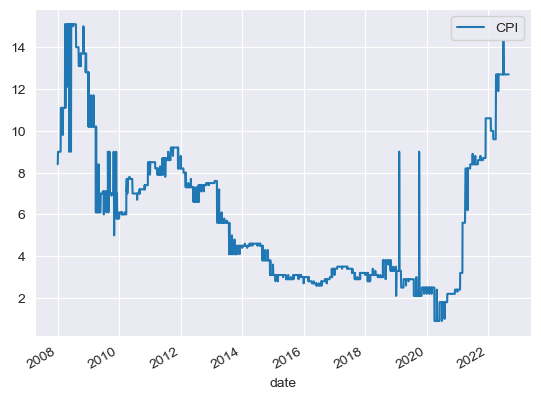

In [19]:
unidf.plot()
plt.show()

The observations shall now be grouped by year for yearly comparisons. This should be interesting to see if possibly some major events during the years may have had an impact on CPI.

In [20]:
unidf.reset_index()

,date,CPI
0,2022-09-02,12.7
1,2022-09-01,12.7
2,2022-08-31,12.7
3,2022-08-30,12.7
4,2022-08-29,12.7
...,...,...
3766,2008-05-01,12.1
3767,2008-06-01,14.5
3768,2008-07-01,15.0
3769,2008-03-01,9.8


In [21]:
unidf.head()

,CPI
date,
2022-09-02,12.7
2022-09-01,12.7
2022-08-31,12.7
2022-08-30,12.7
2022-08-29,12.7


<h5>Histogram & Density Plots</h5>

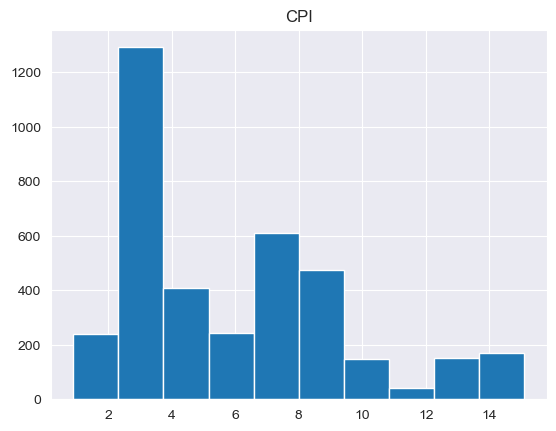

In [22]:
unidf.hist()
plt.show()

The distribution of the CPI is mostly skewed toward 3 which is to be expected since this is the target CPI range for the Central Bank of Botswana. But the data does range all the way from 1 to about 15.

The Density plot below shows the shape of the distribution.

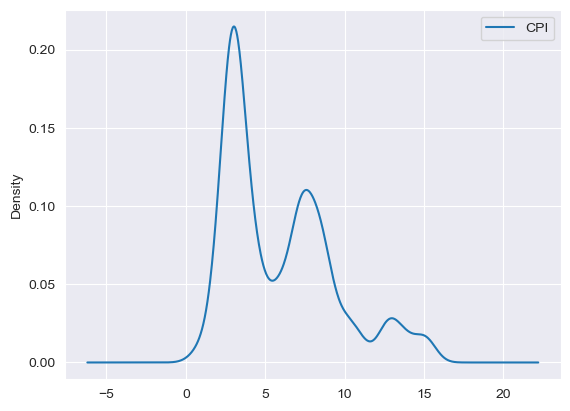

In [23]:
unidf.plot(kind='kde')
plt.show()

It certainly doesn't look like a Gaussian Distribution. It is highly skewed to the right of the mean.

In [24]:
unidf.describe()

,CPI
count,3771.000000
mean,5.906046
std,3.431899
min,0.900000
25%,3.100000
50%,4.600000
75%,8.200000
max,15.100000


<h5>Box & Whisker Plots by Interval</h5>

Now we look at the distribution of CPI over the years using Box and Whisker Plots.

In [25]:
groups = unidf.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year]=group.values
years.boxplot()
pyplot.show()

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

<h5>Heat Map</h5>

<h5>Lag Scatter Plot</h5>

There is a general assumption that there is a relationship between each observation and it's previous observation or lag. Pandas lag plot can portray the relationship between observations and the previous observations.

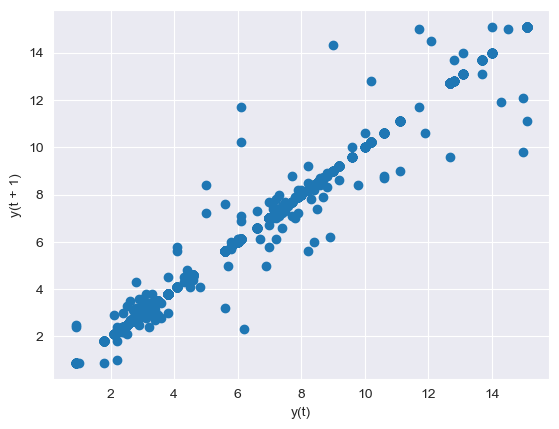

In [26]:
pd.plotting.lag_plot(unidf)
plt.show()

<h5>Autocorrelation Plot</h5>

Autocorrelation plot below will help assess the strength and type of relationship between various CPI entries and their lag values. The plot can help understand how the relationship changes over the lag.

             CPI
date            
2022-09-02  12.7
2022-09-01  12.7
2022-08-31  12.7
2022-08-30  12.7
2022-08-29  12.7
...          ...
2008-05-01  12.1
2008-06-01  14.5
2008-07-01  15.0
2008-03-01   9.8
2008-01-01   8.4

[3771 rows x 1 columns]


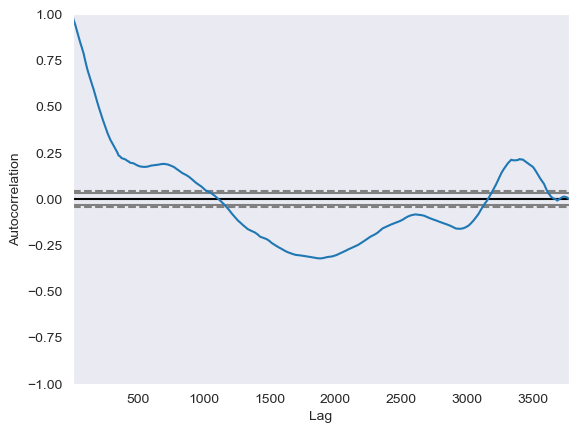

In [27]:
print(unidf)
pd.plotting.autocorrelation_plot(unidf)
plt.show()

Looking at the correlogram plot above, it is easy to see that the highest correlation occurs at the lowest lags. This suggests that the time series data could be a random walk.

To see if this data is a random walk, we can test by calculating the difference between each value and its lag and then plotting to see if the data shows randomness.

            CPI
date           
2022-09-02  NaN
2022-09-01  0.0
2022-08-31  0.0
2022-08-30  0.0
2022-08-29  0.0
...         ...
2008-05-01 -2.9
2008-06-01  2.4
2008-07-01  0.5
2008-03-01 -5.2
2008-01-01 -1.4

[3771 rows x 1 columns]


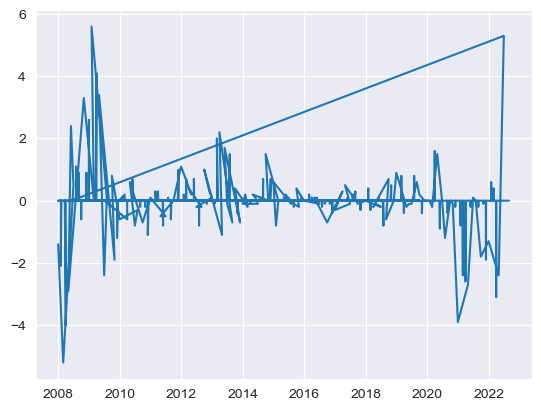

In [28]:
diff = []

value = unidf - unidf.shift(1)

print(value)
plt.plot(value)
plt.show()

<class 'pandas.core.frame.DataFrame'>


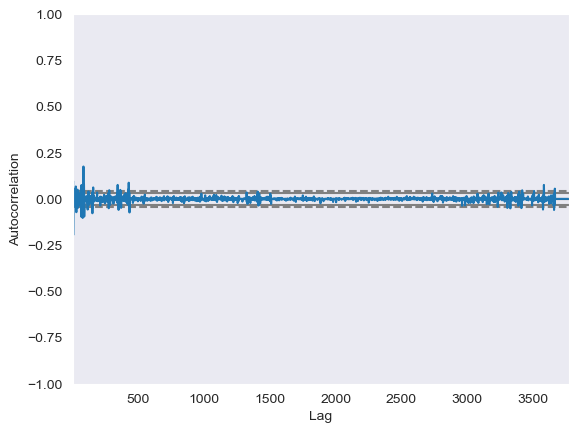

In [29]:
print(type(value))
value.dropna(inplace=True)
pd.plotting.autocorrelation_plot(value)
plt.show()

As can be seen in the above plot, when lag values are subtracted from the data, the autocorrelation becomes very low. This suggests that the data is indeed likely to be a random walk.

As a baseline, in the modelling section, the values will be predicted using their lag values. This will be compared to all other models to see how the performance fares.

<h5>Resampling</h5>

The frequency of the data is also quite important to analyse as it can have an impact on the quality of the final model. Resampling is a technique we can use to analyse various frequencies and see which fits best. We can either try upsampling (increasing frequency) or downsampling (decreasing frequency).

Upsampling involves some interpolation, though that will not be necessary in this analysis as we will only be downsampling.

The frequency at which we would like to predict CPI may be different from the frequency of the data collected. This can be addressed by resampling. In our case, perhaps predicting CPI on a monthly basis is more ideal than doing so on a daily basis.

In [30]:
downsamp = unidf.resample('M').mean()
print(downsamp.head(32))

                  CPI
date                 
2008-01-31   8.972727
2008-02-29  10.900000
2008-03-31  11.635000
2008-04-30  14.918182
2008-05-31  14.686364
2008-06-30  14.808696
2008-07-31  15.095238
2008-08-31  14.141935
2008-09-30  13.260000
2008-10-31  13.647826
2008-11-30  13.719048
2008-12-31  12.691304
2009-01-31  10.436364
2009-02-28  10.265217
2009-03-31   9.730435
2009-04-30   6.295238
2009-05-31   6.440000
2009-06-30   7.043478
2009-07-31   7.047619
2009-08-31   7.081818
2009-09-30   7.090909
2009-10-31   7.090476
2009-11-30   7.000000
2009-12-31   5.977273
2010-01-31   6.095238
2010-02-28   6.015000
2010-03-31   6.313043
2010-04-30   7.605000
2010-05-31   7.704762
2010-06-30   7.127273
2010-07-31   7.000000
2010-08-31   7.004348


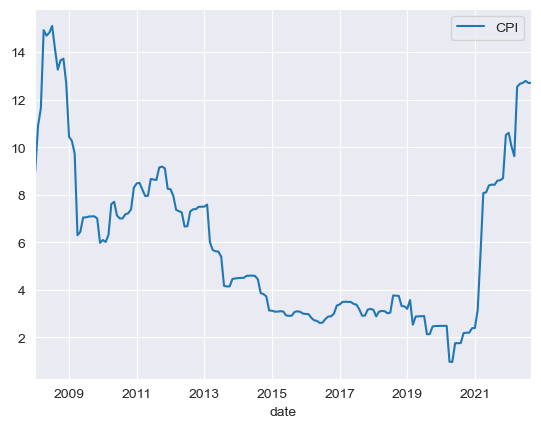

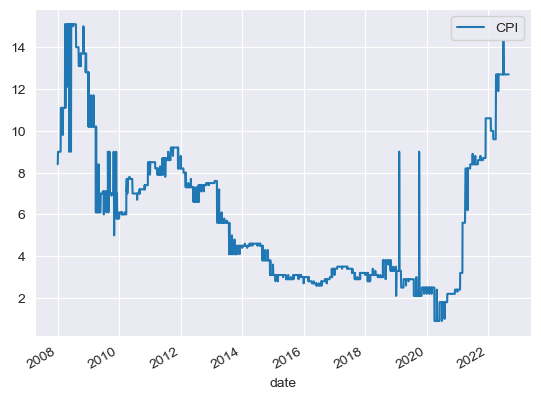

In [31]:
downsamp.plot()
plt.show()

unidf.plot()
plt.show()

<h5>Power Transforms</h5>

One of the major problems that come with time series analysis is learning to deal with noise in the data. One way of doing this is to use data transforms.

We can take a look at the trend of the data below to see if there is any trend.

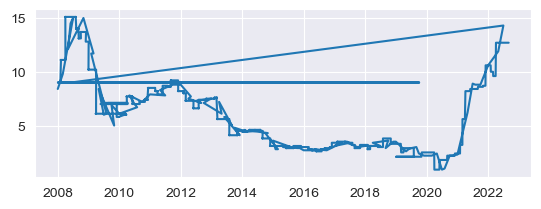

In [32]:
plt.subplot(211)
plt.plot(unidf)
plt.show()

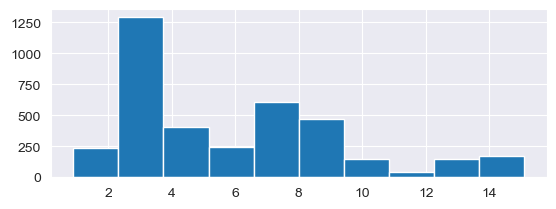

In [33]:
plt.subplot(211)
plt.hist(unidf)
plt.show()

As can be seen with the plots above, it is hard to tell what kind of trend the data exhibits which makes it difficult to decide what transformation would be best. Based on this, a Box-Cox Transform shall be used with lambda = None to see which transformation is most suitable.

Lambda: 0.040575


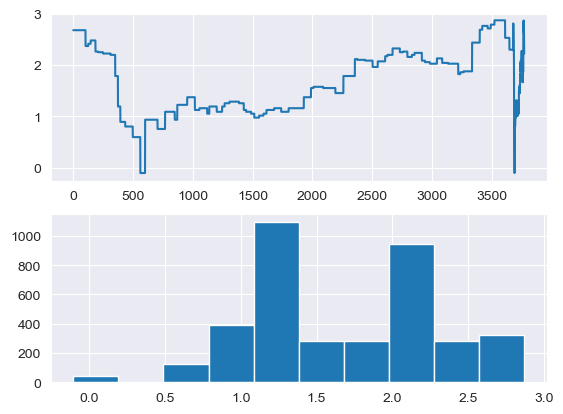

In [34]:
dataframe = pd.DataFrame(unidf.values)
dataframe.columns = ['CPI']
dataframe['CPI'], lam = boxcox(dataframe['CPI'])
print('Lambda: %f' % lam)

plt.figure(1)

plt.subplot(211)
plt.plot(dataframe['CPI'])

plt.subplot(212)
plt.hist(dataframe['CPI'])
plt.show()

The value of lambda is 0.04 which is very close to zero and this suggests that the best transform was the log transform. The resulting histogram still does not give a gaussian distribution though.

</h4>Moving Average Smoothing</h4>

Like performing transformations, the goal of smoothing is to remove noise. Moving average produces a series with average of raw observations from original time series.

There are two types of moving average: Centered and Trailing Moving Average.

Centered Moving Average calculates average of observations at, before, and after time t. This means there knowledge of future values is required. It is generally used to remove trend and seasonal components from time series data.

Trailing Moving Average calculates average of observations at and before time t. This one is used for time series forecasting.

Before calculating moving average, it is important to remove trend and seasonal components from the time series data. Methods for doing this are many, including the differencing method.

Below, moving average is calculated with window size 3.



             CPI
date            
2022-09-02   NaN
2022-09-01   NaN
2022-08-31  12.7
2022-08-30  12.7
2022-08-29  12.7
2022-08-26  12.7
2022-08-25  12.7
2022-08-24  12.7
2022-08-23  12.7
2022-08-22  12.7


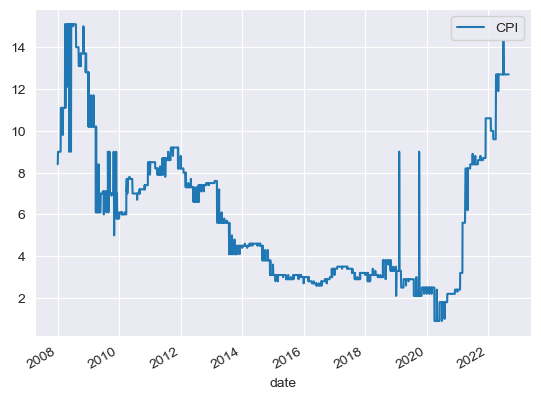

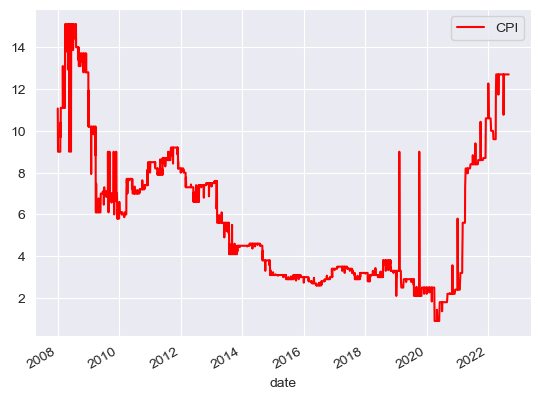

In [35]:
rol = unidf.rolling(window = 3)
rolmean = rol.mean()
print(rolmean.head(10))

unidf.plot()
rolmean.plot(color='red')
plt.show()

Moving average can be used for feature engineering.

Moving average could also be used for predictions as a naive model. It would assume that the trend and seasonality components of the time series have been removed. We won't be doing that here though.

<H4>RANDOM WALK - MEASURING PREDICTABILITY OF TIME SERIES PROBLEM</H4>

In [36]:
print('China Yuan: ' + str(df['CPI'].corr(df['CHN'])))
print('Euro: ' + str(df['CPI'].corr(df['EUR'])))
print('British Pound: ' + str(df['CPI'].corr(df['GBP'])))
print('US Dollar: ' + str(df['CPI'].corr(df['USD'])))
print('Special Drawing Rights: ' + str(df['CPI'].corr(df['SDR'])))
print('Japanese Yen: ' + str(df['CPI'].corr(df['YEN'])))
print('South African Rand: ' + str(df['CPI'].corr(df['ZAR'])))

China Yuan: -0.33564989847939714
Euro: 0.43209037875969575
British Pound: 0.373395951131997
US Dollar: 0.5299863973171307
Special Drawing Rights: 0.36757589684140807
Japanese Yen: 0.5118651086157803
South African Rand: -0.4289183619093809


The US Dollar has the highest correlation coefficient out of all the currencies with 0.599 followed by the YEN with 0.549. The scatter plot below does show some correlation.

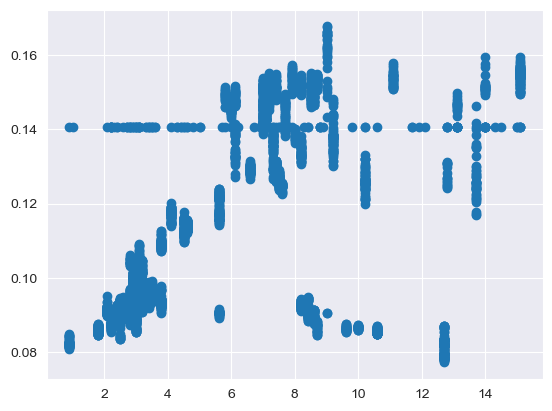

In [37]:
plt.scatter(df['CPI'], df['USD'])

Next we explore correlation between inflation and interest rates.

In [38]:
print('7 Day Bobc: ' + str(df['CPI'].corr(df['7 Day Bobc'])))
print('1 Month BoBC: ' + str(df['CPI'].corr(df['1 Month BoBC'])))

7 Day Bobc: 0.6584285255025645
1 Month BoBC: 0.1860103290087941


The 7 Day Bobc has a significantly high correlation with inflation. It could possibly be a great predictor for inflation.

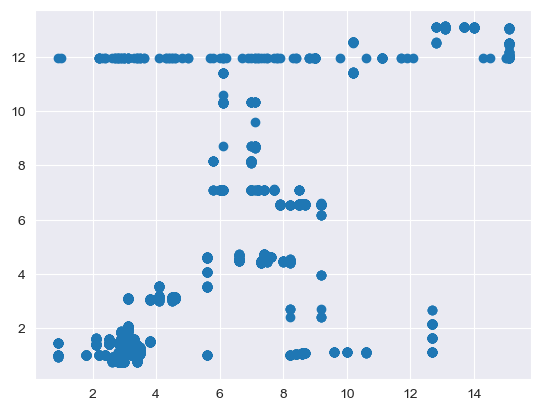

In [39]:
plt.scatter(df['CPI'], df['7 Day Bobc'])

As can be seen above, it is pretty clear that there is a fairly strong correlation between CPI and the 7 day Bobc.

The next step is to make a few plots to see whether there is any seasonality in the data.

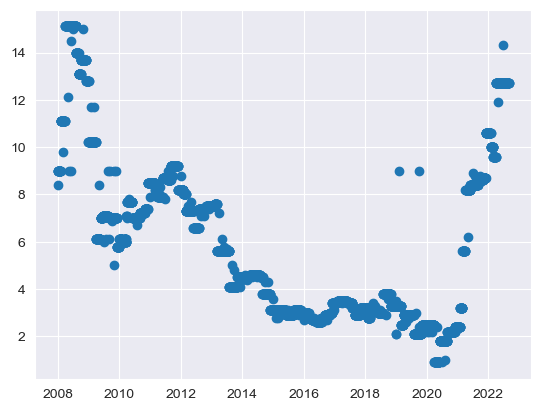

In [40]:
plt.scatter(df.index, df['CPI'])

The scatterplot above shows that CPI was extremely high in 2008 (Possibly due to the recession) although prices were dropping rapidly. There was a small spike in 2012 and then prices dropped significantly and stayed there until 2020. Since 2020, prices have shot up again. Probably due to the covid pandemic and the war between russia and Ukraine. Lets see how the value of USD varied in comparison.

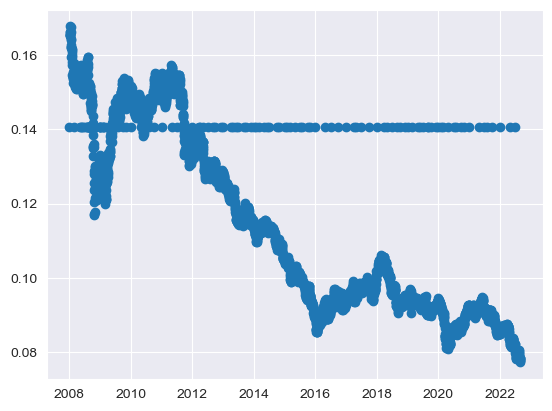

In [41]:
plt.scatter(df.index, df['USD'])

The value of the USD in comparison with the pula has been consistently dropping since 2008.

<AxesSubplot:xlabel='date', ylabel='CPI'>

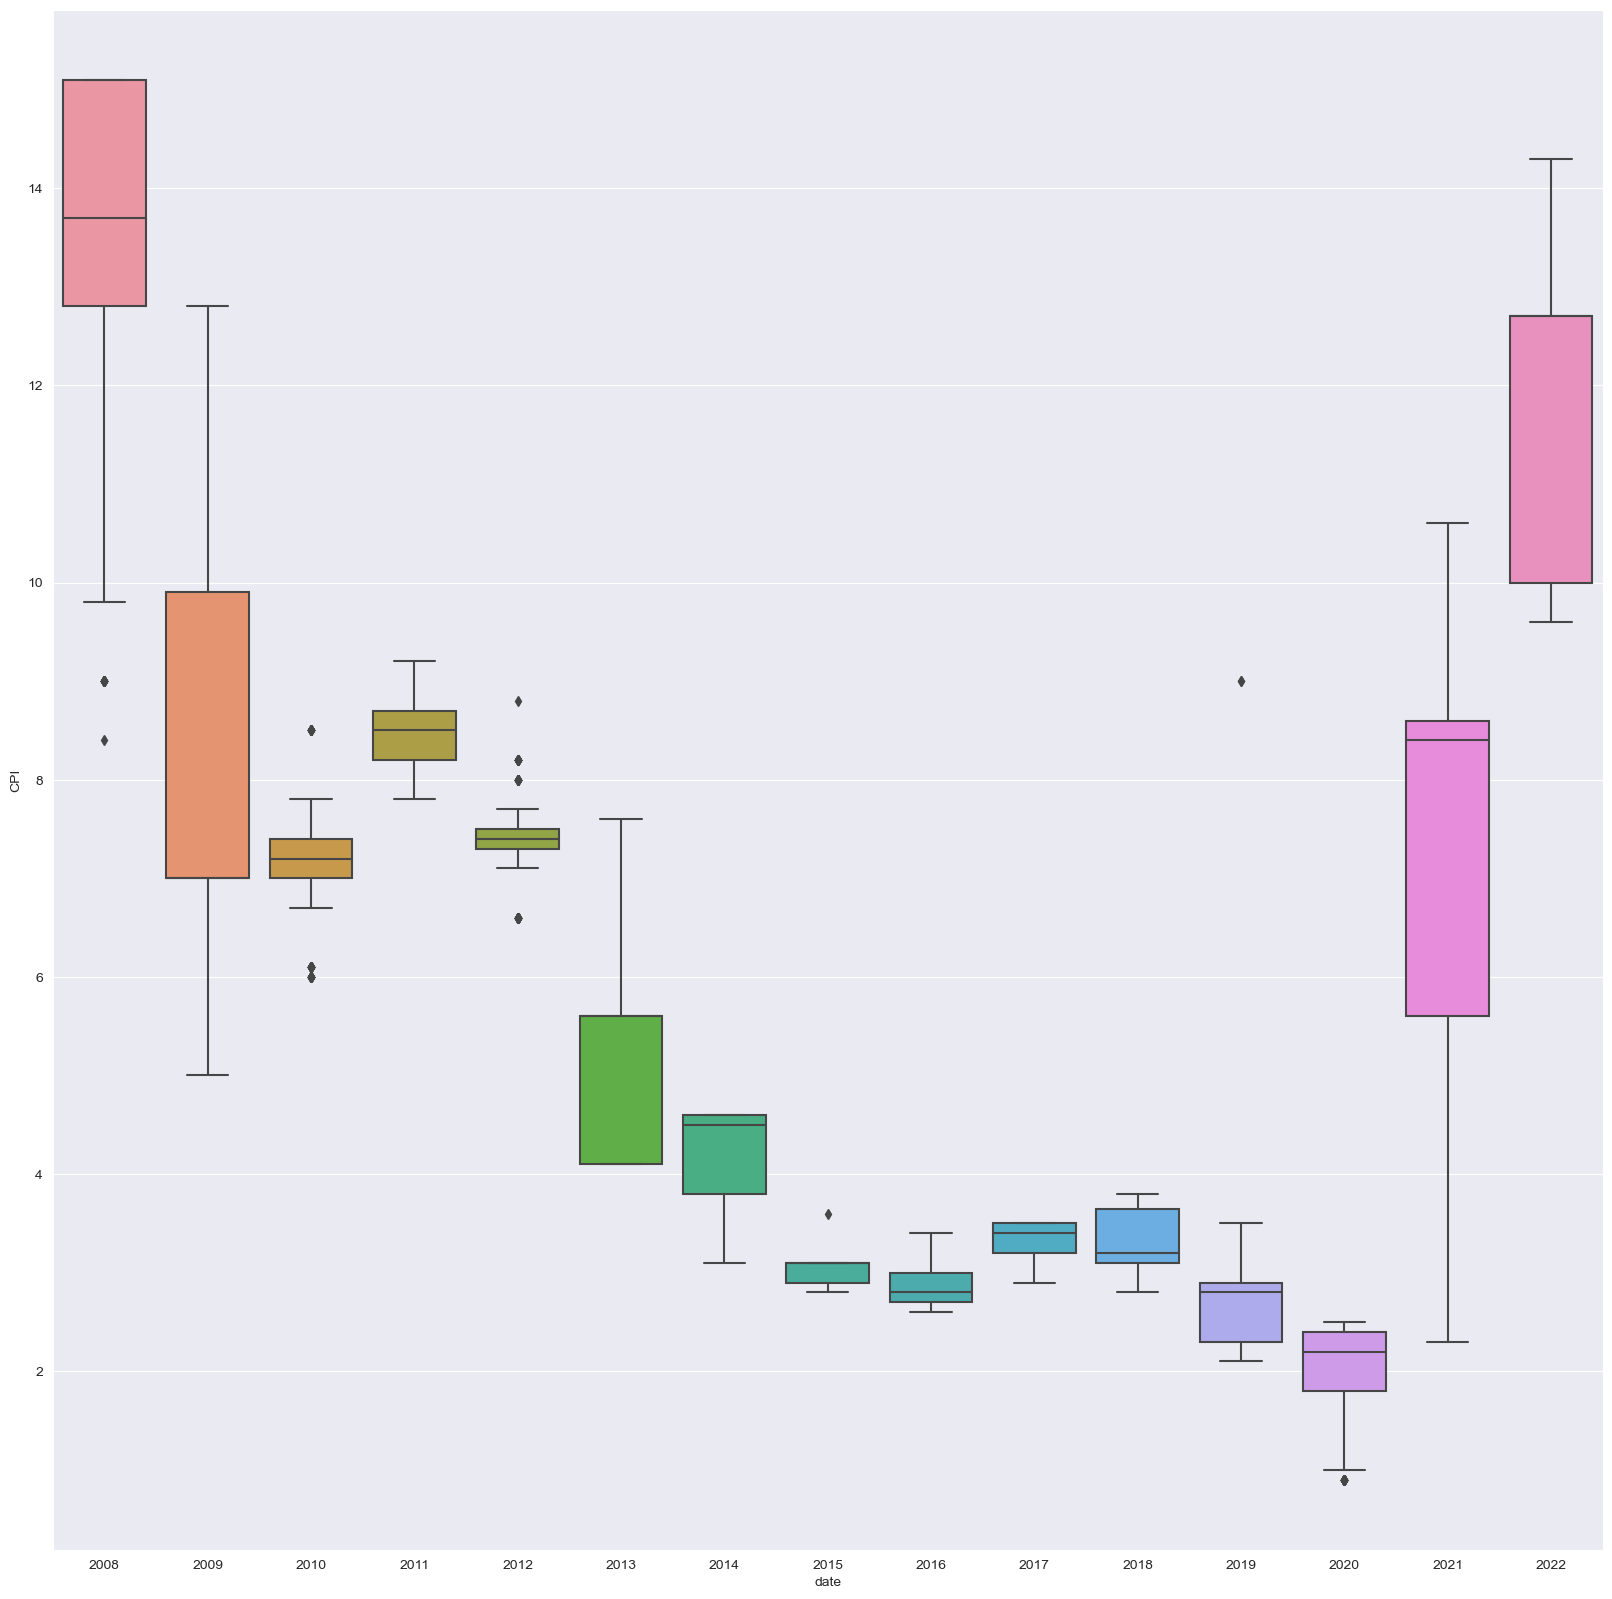

In [42]:
plt.figure(figsize=(20,20))
sns.boxplot(y=df['CPI'], x=df.index.year)

CPI is most volatile in 2021. Ranging from around 2.5 to 10.5. It is lowest in 2020 and highest in 2008. 2022 is the second highest.